In [11]:
import numpy as np
import cv2
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [13]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [3]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/1cropped/"

In [5]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['./dataset/Abhinav Bindra',
 './dataset/Aishwarya Rai Bachchan',
 './dataset/AR Rahman',
 './dataset/Bill Gates',
 './dataset/Cristiano Ronaldo',
 './dataset/Elon Musk',
 './dataset/Joseph Vijay',
 './dataset/Lionel Messi',
 './dataset/Mithali Raj',
 './dataset/MS Dhoni',
 './dataset/Neeraj Chopra',
 './dataset/PV Sindhu',
 './dataset/Rajinikanth',
 './dataset/Rishi Sunak',
 './dataset/Roger Federer',
 './dataset/Satya Nadella',
 './dataset/Shreya Ghoshal',
 './dataset/Smriti Mandhana',
 './dataset/Sundar Pichai',
 './dataset/Virat Kohli']

In [6]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [7]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascade/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascade/haarcascade_eye.xml')

In [8]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
#         print(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/1cropped/Abhinav Bindra
Generating cropped images in folder:  ./dataset/1cropped/Aishwarya Rai Bachchan
Generating cropped images in folder:  ./dataset/1cropped/AR Rahman
Generating cropped images in folder:  ./dataset/1cropped/Bill Gates
Generating cropped images in folder:  ./dataset/1cropped/Cristiano Ronaldo
Generating cropped images in folder:  ./dataset/1cropped/Elon Musk
Generating cropped images in folder:  ./dataset/1cropped/Joseph Vijay
Generating cropped images in folder:  ./dataset/1cropped/Lionel Messi
Generating cropped images in folder:  ./dataset/1cropped/Mithali Raj
Generating cropped images in folder:  ./dataset/1cropped/MS Dhoni
Generating cropped images in folder:  ./dataset/1cropped/Neeraj Chopra
Generating cropped images in folder:  ./dataset/1cropped/PV Sindhu
Generating cropped images in folder:  ./dataset/1cropped/Rajinikanth
Generating cropped images in folder:  ./dataset/1cropped/Rishi Sunak
Generating cropped i

In [8]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Abhinav Bindra': 0,
 'Aishwarya Rai Bachchan': 1,
 'AR Rahman': 2,
 'Bill Gates': 3,
 'Cristiano Ronaldo': 4,
 'Elon Musk': 5,
 'Joseph Vijay': 6,
 'Lionel Messi': 7,
 'Mithali Raj': 8,
 'MS Dhoni': 9,
 'Neeraj Chopra': 10,
 'PV Sindhu': 11,
 'Rajinikanth': 12,
 'Rishi Sunak': 13,
 'Roger Federer': 14,
 'Satya Nadella': 15,
 'Shreya Ghoshal': 16,
 'Smriti Mandhana': 17,
 'Sundar Pichai': 18,
 'Virat Kohli': 19}

In [14]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [15]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(1810, 4096)

In [102]:
cropped_image_dirs

['./dataset/1cropped/Virat Kohli']

In [9]:
celebrity_file_names_dict = {}
for img_dir in img_dirs_cr:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Abhinav Bindra': ['./dataset/1cropped/Abhinav Bindra\\Abhinav Bindra1.png',
  './dataset/1cropped/Abhinav Bindra\\Abhinav Bindra10.png',
  './dataset/1cropped/Abhinav Bindra\\Abhinav Bindra11.png',
  './dataset/1cropped/Abhinav Bindra\\Abhinav Bindra12 (1).png',
  './dataset/1cropped/Abhinav Bindra\\Abhinav Bindra12 (10).png',
  './dataset/1cropped/Abhinav Bindra\\Abhinav Bindra12 (11).png',
  './dataset/1cropped/Abhinav Bindra\\Abhinav Bindra12 (12).png',
  './dataset/1cropped/Abhinav Bindra\\Abhinav Bindra12 (13).png',
  './dataset/1cropped/Abhinav Bindra\\Abhinav Bindra12 (14).png',
  './dataset/1cropped/Abhinav Bindra\\Abhinav Bindra12 (15).png',
  './dataset/1cropped/Abhinav Bindra\\Abhinav Bindra12 (16).png',
  './dataset/1cropped/Abhinav Bindra\\Abhinav Bindra12 (17).png',
  './dataset/1cropped/Abhinav Bindra\\Abhinav Bindra12 (18).png',
  './dataset/1cropped/Abhinav Bindra\\Abhinav Bindra12 (19).png',
  './dataset/1cropped/Abhinav Bindra\\Abhinav Bindra12 (2).png',
  './datas

In [16]:
X

array([[168., 118., 100., ...,  20., 221.,  49.],
       [  3.,  12.,  24., ..., 129., 239., 235.],
       [ 22.,  30.,  40., ..., 167., 254., 224.],
       ...,
       [  8.,  32.,  61., ...,  42., 135.,  93.],
       [ 74., 135., 191., ..., 236.,  59., 250.],
       [112., 121., 148., ..., 150.,  18.,  38.]])

In [17]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [18]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.9116997792494481

In [20]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        31
           1       0.92      0.94      0.93        35
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00         6
           4       0.81      0.87      0.84        15
           5       0.78      1.00      0.88        40
           6       0.82      1.00      0.90        45
           7       1.00      0.83      0.91        12
           8       1.00      0.91      0.95        23
           9       0.92      0.85      0.88        13
          10       0.91      0.84      0.87        25
          11       1.00      0.86      0.92        21
          12       1.00      0.76      0.87        17
          13       1.00      0.85      0.92        26
          14       1.00      0.84      0.91        19
          15       1.00      0.83      0.91        18
          16       1.00      0.92      0.96        25
          17       0.91    

In [21]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [22]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [23]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.893903,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.790721,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.892416,{'logisticregression__C': 1}


In [24]:
best_estimators['svm'].score(X_test,y_test)

0.9183222958057395

In [25]:
best_estimators['random_forest'].score(X_test,y_test)

0.8653421633554084

In [26]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9028697571743929

In [27]:
best_clf = best_estimators['svm']

Text(69.0, 0.5, 'Truth')

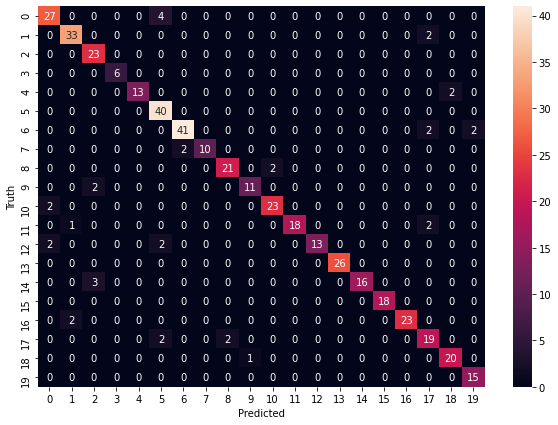

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
class_dict

{'Abhinav Bindra': 0,
 'Aishwarya Rai Bachchan': 1,
 'AR Rahman': 2,
 'Bill Gates': 3,
 'Cristiano Ronaldo': 4,
 'Elon Musk': 5,
 'Joseph Vijay': 6,
 'Lionel Messi': 7,
 'Mithali Raj': 8,
 'MS Dhoni': 9,
 'Neeraj Chopra': 10,
 'PV Sindhu': 11,
 'Rajinikanth': 12,
 'Rishi Sunak': 13,
 'Roger Federer': 14,
 'Satya Nadella': 15,
 'Shreya Ghoshal': 16,
 'Smriti Mandhana': 17,
 'Sundar Pichai': 18,
 'Virat Kohli': 19}

In [30]:
!pip install joblib
import joblib 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [31]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [7]:
import os
img_dirs_cr = []
for entry in os.scandir(path_to_cr_data):
    if entry.is_dir():
        img_dirs_cr.append(entry.path)
img_dirs_cr

['./dataset/1cropped/Abhinav Bindra',
 './dataset/1cropped/Aishwarya Rai Bachchan',
 './dataset/1cropped/AR Rahman',
 './dataset/1cropped/Bill Gates',
 './dataset/1cropped/Cristiano Ronaldo',
 './dataset/1cropped/Elon Musk',
 './dataset/1cropped/Joseph Vijay',
 './dataset/1cropped/Lionel Messi',
 './dataset/1cropped/Mithali Raj',
 './dataset/1cropped/MS Dhoni',
 './dataset/1cropped/Neeraj Chopra',
 './dataset/1cropped/PV Sindhu',
 './dataset/1cropped/Rajinikanth',
 './dataset/1cropped/Rishi Sunak',
 './dataset/1cropped/Roger Federer',
 './dataset/1cropped/Satya Nadella',
 './dataset/1cropped/Shreya Ghoshal',
 './dataset/1cropped/Smriti Mandhana',
 './dataset/1cropped/Sundar Pichai',
 './dataset/1cropped/Virat Kohli']